# Introduction

In this notebook, we demonstrate using the support vector machine (SVM) classifier to classify users' smartphone swipes as genuine or imposter. The smartphone swipe data was collected from students and staff at Southern CT State University over 3 separate sessions. The notebook is divided into 3 sections: Data Pre-Processing, Authentication Testing, and Evaluating the Results.

# I. Data Pre-Processing

### Import the Data and Relevant Features
Here we import the data set. Each row in the data set represents a smartphone swipe, and each swipe provides 27 features represented in the columns of the data set. The column labels use the following naming convention:

- The first 2 digits represent the finger. In this example, we use 24 which corresponds to left thumb.
- The letter in the middle indicates the direction of the swipe. In this case, we use L which corresponds to a swipe starting from right going to left. We collected left and right swipes, corresponding to codes L and R, respectively.
- The final 2 letters indicate the type of feature collected. For example, 'AP' stands for pressure at the start of the swipe and 'WY' means maximum vertical velocity during the swipe.

A note about the structure of the data set file. We collected 10 different swipes: $\text{5 fingers} \times \text{2 directions} = \text{10 swipe types}$. We had 36 participants. For each type of swipe, we collected 10 swipes in each of 3 sessions, so 30 swipes per person resulting in 1080 swipes total $((\text{10 swipes} \times \text{3 sessions})\times\text{36 users})=\text{1080 swipes}$. In the data set, we stacked the swipes by session. So the first 360 swipes are swipes users gave in the first session, the next 360 are swipes given in the second session, and so on. The 10 types of swipes are lined up horizontally in the data set file, so not counting the ID column, the first 27 columns are features that correspond to the first type of swipe collected (index finger left direction), and the next 27 columns are features belonging to the next type of swipe (index finger right direction), and so on.

When we import the data and relevant features, we work with 1 swipe type at a time. Thus, in this example we import along indicies starting with '24_L_AP', the first of the 27 features for type 24_L, and ending with '24_L_WY', the last.

In [1]:
import pandas as pd

features_data = pd.read_csv("swipe_data.csv")

# Use only right swipe, 21
column_list = list(features_data.columns)
id_index = column_list.index('ID')
start_index = column_list.index('24_L_AP')
end_index = column_list.index('24_L_WY') + 1
column_names = ['ID'] + list(features_data.columns[start_index:end_index])
features_data = features_data.loc[:, column_names].dropna().reset_index(drop=True)

features_data

,ID,24_L_AP,24_L_AS,24_L_BP,24_L_BS,24_L_CP,24_L_CS,24_L_DP,24_L_DS,24_L_EP,...,24_L_M,24_L_N,24_L_O,24_L_P,24_L_UX,24_L_UY,24_L_VX,24_L_VY,24_L_WX,24_L_WY
0,A,0.7375,0.4667,0.6625,0.4667,0.7875,0.5333,0.6625,0.4667,0.752083,...,0.303855,462.747351,0.184874,4.956010,0.0002,0.0002,3.255791,0.931691,12.7500,4.6250
1,A,0.7375,0.4667,0.7125,0.4667,0.7875,0.4667,0.7125,0.4667,0.755208,...,0.380835,436.359350,0.278846,4.733867,0.3750,0.1250,2.715727,1.001545,5.3333,2.5556
2,A,0.7375,0.4667,0.6875,0.4667,0.7500,0.4667,0.6875,0.4667,0.734091,...,0.456140,251.788937,0.294118,2.983325,0.3750,0.1250,1.940630,0.862490,4.7778,2.5556
3,A,0.7375,0.4667,0.6875,0.4667,0.7500,0.4667,0.6875,0.4667,0.734091,...,0.509881,284.194357,0.445946,3.380827,0.2500,0.1250,2.518040,1.276340,7.6250,4.1250
4,A,0.6875,0.4667,0.6500,0.4000,0.7000,0.4667,0.6500,0.4000,0.689583,...,0.401515,285.325488,0.250000,3.058984,0.2500,0.0588,2.097318,0.848236,6.1250,3.0000
5,A,0.6875,0.4667,0.6625,0.4000,0.7000,0.4667,0.6625,0.4000,0.689583,...,0.583333,305.720782,0.555556,3.286385,0.2222,0.1111,2.007509,1.168573,4.7778,2.7778
6,A,0.6875,0.4000,0.6625,0.4000,0.7000,0.4000,0.6625,0.4000,0.690179,...,0.445521,453.127034,0.469880,4.110308,0.2222,0.1111,2.539546,1.110515,10.1250,3.1250
7,A,0.7000,0.4667,0.6625,0.4000,0.7250,0.4667,0.6625,0.4000,0.708333,...,0.424658,397.334486,0.333333,3.332333,0.2222,0.1111,2.004950,0.828664,8.0000,3.4444
8,A,0.6750,0.4000,0.6500,0.4000,0.7000,0.4000,0.6500,0.4000,0.683036,...,0.469914,386.515121,0.378788,3.505568,0.1111,0.1111,2.109069,1.015569,6.0000,3.3750
9,A,0.6875,0.4667,0.6500,0.4000,0.7375,0.4667,0.6500,0.4000,0.710294,...,0.482625,576.476137,0.457143,4.260541,0.1250,0.1250,2.031144,1.007950,5.7778,3.4444


### Preprocess Data

In our preprocessing, we first change the ID column to type int. There is also code that allows removing problematic data, usually users giving invalid swipes. In the case of this type of swipe, no such removal is necessary. In addition, we perform our train test split. We use swipes collected from the first 2 sessions for training the classifier, and the final session for testing. Finally, we perform outlier detection of the training and testing set. In the testing set outlier detection, we use mean and standard deviations derived from the training set.

In [2]:
# 2a. Change ID to type int

#import the necessary module
from sklearn import preprocessing

# create the Labelencoder object
le = preprocessing.LabelEncoder()

# convert categorical ID to numeric type
features_data['ID'] = le.fit_transform(features_data['ID'])

# remove problematic people from dataset
# features_data = features_data.loc[~features_data['ID'].isin([2, 21])]
# features_data = features_data.reset_index(drop=True)

In [3]:
# 2b. Outlier detection

from sklearn.model_selection import train_test_split

def meanStdev(genuine_train, cols):
    meanStdDict = {}
    for i in cols:
        meanStdDict[i] = [genuine_train[i].mean(), genuine_train[i].std(), genuine_train[i].median()]
    return meanStdDict

def outlierDetection(dtr, id, summary_stats):
    # dtr_1 is genuine, dtr_2 is imposter
    dtr_1 = dtr.loc[dtr['ID'] == id]
    dtr_1 = dtr_1.reset_index(drop=True)
    dtr_1_copy = dtr_1.copy()
    dtr_2 = dtr.loc[dtr['ID'] != id]
    
    # select columns other than 'ID'
    cols = [col for col in dtr_1.columns if col not in ['ID']]
    
    meanStdDict = {}  #In this dict, key is feature label, value is [column mean, column std dev, column median]
    replace_total = 0
    replace_row_dict = {}  #Key is row #, value is # of replacements
    replace_column_dict = {}  #Key is column name, value is # of replacements
    replace_list = []  #Exact cell that was replaced
    
    meanStdDict = meanStdev(dtr_1_copy, cols)
    
    for i in cols:
        for j in range(len(dtr_1_copy[i])):
            if abs(dtr_1_copy[i][j] - meanStdDict[i][0]) > (3.5 * meanStdDict[i][1]):
                dtr_1_copy[i][j] = meanStdDict[i][2]
                replace_total += 1
                replace_row_dict[j] = replace_row_dict.get(j, 0) + 1
                replace_column_dict[i] = replace_column_dict.get(i, 0) + 1
                replace_list.append([i, j])

    summary_stats[id] = [replace_total, replace_row_dict, replace_column_dict, replace_list]
    dtr = pd.concat([dtr_1_copy, dtr_2])
    dtr = dtr.reset_index(drop=True)
    return dtr, summary_stats, meanStdDict


# Train Test Split, execute outlier detection (index 720 marks the split)
dtr = features_data.iloc[:720, :].copy()
dte = features_data.iloc[720:, :].copy()
list_ids = features_data['ID'].unique()

summary_stats = {} # summary stats for each replacement.
                   # Key is ID, Value is [replace_total, replace_row_dict, replace_column_dict, replace_list]
summary_mean_std_med = {}  # Key is ID, Value is Dict where key is Feature label value is [mean, std, median]

for i in list_ids:
    dtr, summary_stats, meanStdDict = outlierDetection(dtr, i, summary_stats)
    summary_mean_std_med[i] = meanStdDict

C:\Users\Jedrik\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [4]:
# Summary stats of outliers that were replaced
# summary_stats = [replace_total, replace_row_dict, replace_column_dict, replace_list]
summary_stats[1]

[2, {3: 2}, {'24_L_BP': 1, '24_L_DP': 1}, [['24_L_BP', 3], ['24_L_DP', 3]]]

 - Outlier Detection of Test Set

In [5]:
# Recalculate the means and std dev after replacement
def outlierDetectTest(dte, id, summary_stats_test, summary_mean_std_med):
    # dte_1 is genuine, dte_2 is imposter
    dte_1 = dte.loc[dte['ID'] == id]
    dte_1 = dte_1.reset_index(drop=True)
    dte_1_copy = dte_1.copy()
    dte_2 = dte.loc[dte['ID'] != id]
    
    # select columns other than 'ID'
    cols = [col for col in dte_1.columns if col not in ['ID']]
    
    delete_total = 0
    delete_total_rows = 0
    delete_row_dict = {}
    
    for i in cols:
        for j in range(len(dte_1_copy[i])):
            if abs(dte_1_copy[i][j] - summary_mean_std_med[id][i][0]) > (3.5 * summary_mean_std_med[id][i][1]):
                delete_total += 1
                delete_row_dict[j] = delete_row_dict.get(j, 0) + 1
    
    indices = list(dte_1_copy.index.values)
    
    for ind in indices:
        if (delete_row_dict.get(ind, 0) > 0):
            delete_total_rows += 1
            dte_1_copy = dte_1_copy.drop([ind])

    summary_stats_test[id] = [delete_total, delete_row_dict, delete_total_rows]
    dte = pd.concat([dte_1_copy, dte_2])
    dte = dte.reset_index(drop=True)
    return dte, summary_stats_test
    

summary_stats_test = {} # Key is ID, Value is [delete_total, row deletions]
for i in list_ids:
    dte, summary_stats_test = outlierDetectTest(dte, i, summary_stats_test, summary_mean_std_med)

In [6]:
summary_stats_test
# summary_mean_std_med[0]['21_L_AP'][0]

{0: [4, {1: 2, 2: 2}, 2],
 11: [0, {}, 0],
 12: [1, {5: 1}, 1],
 13: [4, {2: 3, 8: 1}, 2],
 14: [21, {9: 5, 0: 3, 5: 3, 8: 4, 1: 1, 3: 2, 4: 1, 6: 2}, 8],
 15: [0, {}, 0],
 16: [0, {}, 0],
 17: [6, {1: 1, 4: 1, 6: 1, 3: 1, 2: 2}, 5],
 18: [17, {1: 4, 2: 7, 4: 4, 3: 2}, 4],
 19: [20, {2: 3, 4: 4, 7: 5, 8: 3, 5: 2, 3: 3}, 6],
 20: [10, {7: 4, 8: 4, 6: 2}, 3],
 21: [5, {2: 2, 7: 2, 8: 1}, 3],
 22: [14, {1: 3, 5: 3, 7: 4, 8: 3, 4: 1}, 5],
 23: [0, {}, 0],
 24: [9, {6: 2, 7: 2, 9: 2, 0: 2, 2: 1}, 5],
 25: [4, {7: 2, 8: 2}, 2],
 26: [1, {4: 1}, 1],
 27: [6, {2: 3, 3: 1, 0: 2}, 3],
 28: [1, {1: 1}, 1],
 29: [7, {8: 3, 5: 2, 7: 1, 2: 1}, 4],
 30: [1, {4: 1}, 1],
 31: [16, {8: 4, 9: 4, 6: 2, 7: 3, 5: 1, 2: 2}, 6],
 32: [18, {3: 5, 4: 5, 5: 2, 9: 4, 8: 1, 7: 1}, 6],
 33: [5, {2: 2, 4: 1, 1: 1, 0: 1}, 4],
 34: [4, {3: 2, 4: 2}, 2],
 35: [10, {0: 2, 5: 2, 9: 3, 8: 3}, 4],
 1: [2, {0: 2}, 1],
 2: [10, {0: 4, 1: 6}, 2],
 3: [32, {2: 7, 4: 9, 8: 7, 9: 8, 3: 1}, 5],
 4: [11, {4: 3, 6: 3, 8: 3, 9: 2}, 

# II. Authentication Testing

First, we perform grid search to find the optimal parameters we should use in our classifier to give the best authentication results. Then we normalize our train and test sets.  Finally, we perform authentication tests on each of the users.

In authentication tests, we rename a given user the ID 1 which we call genuine user. The remaining users' swipes are renamed 1 indicating imposter. The aim is for the classifier to properly classify each swipe in the testing set as either genuine 1 or imposter 0.

 - Resample Train Set Method
1. Renames the ID column so genuine is 1 and imposter is 0
2. Upsamples genuine, downsamples imposter

We need a resampling method which we use in training the classifier so that we avoid sampling biases.

In [7]:
from sklearn.utils import resample

def resample_train(dtr, id):
    cloned_data_dtr = dtr.copy()
    for i,j in cloned_data_dtr.iterrows():
        if j.ID != id:
            cloned_data_dtr.loc[i, 'ID'] = 0
        else:
            cloned_data_dtr.loc[i, 'ID'] = 1

    
    # Resample. Upsample genuine train class. Downsample imposter train class. Test classes don't touch!
    upsample_genuine_train = cloned_data_dtr.loc[cloned_data_dtr.ID == 1]    
    upsample_genuine_train = resample(upsample_genuine_train, replace=True, n_samples=200, random_state=1)
    
    downsample_imposter_train = cloned_data_dtr.loc[cloned_data_dtr.ID == 0]    
    downsample_imposter_train = resample(downsample_imposter_train, replace=False, n_samples=400, random_state=1)
    
    # Concatenate the train files
    resampled_dtr = pd.concat([upsample_genuine_train, downsample_imposter_train])
    
    return resampled_dtr

### Grid Search CV
Note: We did not normalize before grid search because normalization is included in the pipeline.

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

def grid_search(dtr, id_list):
    C_list = {}
    kernel_list = {}
    gamma_list = {}
    accuracy_list = {}
    
    pipeline = Pipeline([('scalar', StandardScaler()),
                        ('svm', SVC())])
    
    Cs = [.001, .01, .1, 1, 10]
    gammas = [.001, .01, .1, 1]
#     gammas = ['scale', 'auto']
    kernel = ['rbf', 'linear']
    param_grid = {'svm__C': Cs,
                 'svm__gamma': gammas,
                 'svm__kernel': kernel}
    
    cols = [col for col in dtr.columns if col not in ['ID']]
    
    for i in id_list:
        
        resampled_train = resample_train(dtr, i)
        train = resampled_train[cols]
        target = resampled_train['ID']
        
        grid_search = GridSearchCV(pipeline, param_grid, cv=None)
        grid_search.fit(train, target)

        C_list[i] = grid_search.best_params_['svm__C']
        kernel_list[i] = grid_search.best_params_['svm__kernel']
        gamma_list[i] = grid_search.best_params_['svm__gamma']
        accuracy_list[i] = grid_search.best_score_
    
    return C_list, kernel_list, gamma_list, accuracy_list

        
list_ids = features_data['ID'].unique()
C_list, kernel_list, gamma_list, accuracy_list = grid_search(dtr, list_ids)
    

C:\Users\Jedrik\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Jedrik\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Jedrik\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Jedrik\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the defau

C:\Users\Jedrik\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Jedrik\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Jedrik\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Jedrik\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the defau

In [12]:
# Optional-check the parameters lists

# gamma_list
# kernel_list
# C_list
# accuracy_list

### Normalization

In [9]:
from sklearn.preprocessing import StandardScaler

# Use Standard Scalar instead
def standardScalar(dtr, dte):
    scalar = StandardScaler()
    cols = [col for col in dtr.columns if col not in ['ID']]
    dtr_id_column = dtr['ID']
    dte_id_column = dte['ID']
    dte_id_column = dte_id_column.reset_index(drop=True)
    
    train = pd.DataFrame(data=scalar.fit_transform(dtr[cols]), columns=cols)
    test = pd.DataFrame(data=scalar.transform(dte[cols]), columns=cols)
    
    train.insert(0,'ID', dtr_id_column, True)
    test.insert(0, 'ID', dte_id_column, True)
    
    return train, test

dtr, dte = standardScalar(dtr, dte)

In [10]:
dte.head()

,ID,24_L_AP,24_L_AS,24_L_BP,24_L_BS,24_L_CP,24_L_CS,24_L_DP,24_L_DS,24_L_EP,...,24_L_M,24_L_N,24_L_O,24_L_P,24_L_UX,24_L_UY,24_L_VX,24_L_VY,24_L_WX,24_L_WY
0,10,-0.132738,0.344220,0.728356,0.485128,-0.259099,0.315981,0.731894,0.500206,0.020768,...,0.365511,1.061133,0.301457,1.540779,1.261081,-0.555608,1.894875,1.164804,1.426181,1.333543
1,10,0.450014,0.344220,0.943436,2.090343,0.302802,0.315981,0.947355,2.096705,0.682057,...,0.408316,1.535361,0.319224,1.728946,-0.127218,1.042134,0.350648,0.161908,1.930699,0.838397
2,9,-0.132738,-1.002804,0.728356,-1.117681,-0.259099,-1.038164,0.731894,-1.093900,0.094701,...,-0.077059,-1.300786,0.083300,-0.640950,-0.934843,-0.712339,0.251379,-0.232166,0.056774,-0.415948
3,9,0.158638,0.344220,0.620817,0.485128,0.021852,0.315981,0.624164,0.500206,0.426030,...,0.334908,-0.840463,0.278426,-0.463866,-0.217350,0.943226,-0.233495,0.006633,0.056774,0.145191
4,9,0.450014,0.344220,-0.347039,-1.117681,0.302802,0.315981,-0.345411,-1.093900,0.148919,...,0.038149,-0.836806,0.068765,-0.731917,0.142855,0.943226,-0.130688,-0.226326,0.056774,-0.250926


### Authentication Testing Using SVC
How it works:
1. Massive for loop that performs SVC with each user
2. In each for loop, clone the test set dte. Relabel genuine user as 0 and imposters 1 in dte.
3. Resample the train set dtr using method resample_train().
4. Create target train/test and data train/test to feed into SVC model.
5. Create 2 SVC models, then compare if default or gridsearch parameters are better.
6. Save target test, score, and pred results in maps/lists. These will be used to create ROC and DET curves.

In [11]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score
from sklearn.utils import resample
from sklearn.metrics import roc_curve

list_ids = features_data['ID'].unique()
cols = [col for col in features_data.columns if col not in ['ID']]

roc_auc_list = []

all_target_test = pd.DataFrame()
all_score = []
all_pred = []

for l in list_ids:
    cloned_data_dte = dte.copy()
    for i,j in cloned_data_dte.iterrows():
        if j.ID != l:
            cloned_data_dte.loc[i, 'ID'] = 0
        else:
            cloned_data_dte.loc[i, 'ID'] = 1
    
    # Resample. Upsample genuine train class. Downsample imposter train class. Test classes don't touch!
    genuine_test = cloned_data_dte.loc[cloned_data_dte.ID == 1]
    imposter_test = cloned_data_dte.loc[cloned_data_dte.ID == 0]
    
    # Concatenate the train and test files
    resampled_dte = pd.concat([genuine_test, imposter_test])
    resampled_dtr = resample_train(dtr, l)

    # assigning 'ID' column as target for test and train, store target_test in all_target_test
    target_test = resampled_dte['ID']
    all_target_test = pd.concat([all_target_test, target_test], ignore_index=True)
    target_train = resampled_dtr['ID']
    
    # dropping the 'ID' column from test and train
    data_test_noID = resampled_dte[cols]
    data_train_noID = resampled_dtr[cols]
    
    # Create 2 SVC models, then compare if default or gridsearch parameters are better
    # Train SVC models
    svc_model = SVC(C=C_list[l], kernel=kernel_list[l], gamma=gamma_list[l], random_state=0, probability=True)
    svc_model.fit(data_train_noID, target_train)
    svc_model_default_gamma = SVC(C=C_list[l], 
                                  kernel=kernel_list[l], gamma='scale', random_state=0, probability=True)
    svc_model_default_gamma.fit(data_train_noID, target_train)

    # Predict using the testing data, get ROC curves and AUC for both SVC models
    score = svc_model.predict_proba(data_test_noID)
    score_default = svc_model_default_gamma.predict_proba(data_test_noID)
    roc_auc = roc_auc_score(target_test, score[:,1])
    roc_auc2 = roc_auc_score(target_test, score_default[:,1])
    
    if roc_auc2 > roc_auc:
        pred = svc_model_default_gamma.predict(data_test_noID)
        all_pred.append(pred)
        all_score.append(score_default)
#         auth_acc_map[l] = accuracy_score(target_test, pred, normalize = True)
#         raw_prob_score_map[l] = score_default
        
#         accuracy_list.append(accuracy_score(target_test, pred, normalize = True))
#         precision_list.append(precision_score(target_test, pred))
        roc_auc_list.append(roc_auc2)
    else:
        pred = svc_model.predict(data_test_noID)
        all_pred.append(pred)
        all_score.append(score)
#         auth_acc_map[l] = accuracy_score(target_test, pred, normalize = True)
#         raw_prob_score_map[l] = score
        
#         accuracy_list.append(accuracy_score(target_test, pred, normalize = True))
#         precision_list.append(precision_score(target_test, pred))
        roc_auc_list.append(roc_auc)
    


# III. Evaluating the Results

First, we use all the saved target_test sets, pred, and score results to plot the cumulative receiver operating characteristic (ROC) curve. The ideal curve is close to the top left corner, indicating high true positive rate and low false positive rate. To measure how close an ROC plot is to the ideal, we calculate the area under the curve (AUC), which ranges from 0 to 1. The closer to 1 the better our authentication with the gesture performed.

Then, we use all the saved target_test sets and score results to create a detection error trade off (DET) curve. This is a plot of false positive rate (FPR) against the false rejection rate (FRR). This curve gives equal error rate (EER), which is the point at which FPR and FRR are equal. An EER close to 0 indicates good performance.

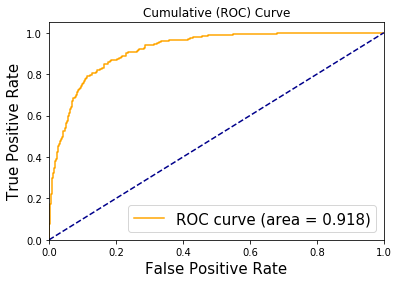

In [13]:
import matplotlib.pyplot as plt
import numpy as np

def cummulative_roc(all_target_test, all_score, all_pred):
    # create cummulative score
    cummulative_score = np.vstack(all_score)
    
    fper, tper, thresholds = roc_curve(all_target_test, cummulative_score[:,1])
    roc_auc = roc_auc_score(all_target_test, cummulative_score[:,1])
    
    plt.plot(fper, tper, color='orange', label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize = 15)
    plt.ylabel('True Positive Rate', fontsize = 15)
    plt.title('Cumulative (ROC) Curve')
    plt.legend(loc="lower right", prop={'size': 15})
    plt.show()

cummulative_roc(all_target_test, all_score, all_pred)

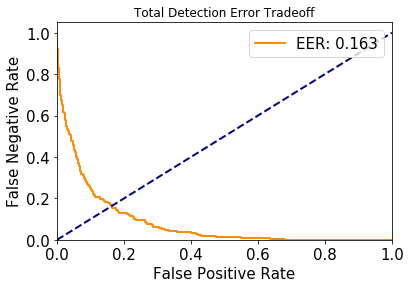

In [14]:
from scipy.interpolate import interp1d
from scipy.optimize import brentq

def cumulative_det(all_target_test, all_score):
    
    cumulative_score = np.vstack(all_score)
    fpr, tpr, _ = roc_curve(all_target_test, cumulative_score[:,1])
    
    eer = brentq(lambda x : 1. - x - interp1d(fpr, tpr)(x), 0., 1.)
    
    plt.figure()
    lw = 2

    plt.plot(fpr, 1-tpr, color='darkorange',
             lw=lw, label="EER: "+ str(round(eer, 3)))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize = 15)
    plt.ylabel('False Negative Rate', fontsize = 15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title('Total Detection Error Tradeoff')
    plt.legend(loc="upper right", prop={'size': 15})
    plt.show()

cumulative_det(all_target_test, all_score)